In [1]:
#installing necessary libraries
import numpy as np
from qiskit import *

In [2]:
#initializing and displaying the pauli array
pauli = np.array([[[1,0],[0,1]], [[1,0],[0,-1]], [[0,1],[1,0]], [[0,-1j],[1j,0]]])
pauli

array([[[ 1.+0.j,  0.+0.j],
        [ 0.+0.j,  1.+0.j]],

       [[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]],

       [[ 0.+0.j,  1.+0.j],
        [ 1.+0.j,  0.+0.j]],

       [[ 0.+0.j, -0.-1.j],
        [ 0.+1.j,  0.+0.j]]])

In [3]:
#applying kronecker product
pauli_combinations = []
for i in pauli:
    pauli_combinations.append(np.kron(i, i))
    print(np.kron(i, i))
    print()

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j -0.+0.j  1.-0.j]]

[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]

[[ 0.+0.j  0.-0.j  0.-0.j -1.+0.j]
 [ 0.+0.j  0.+0.j  1.-0.j  0.-0.j]
 [ 0.+0.j  1.-0.j  0.+0.j  0.-0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]



In [4]:
#initialzing all pauli combinations with the respective variables(the matrices)
ii = pauli_combinations[0]
zz = pauli_combinations[1]
xx = pauli_combinations[2]
yy = pauli_combinations[3]

In [5]:
#finding out the eigenvalues and eigenvectors of the matrices
print('ii:\neigenvalues: ', np.linalg.eig(ii)[0], '\neigenvectors\n',np.linalg.eig(ii)[1])
print()
print('zz:\neigenvalues: ', np.linalg.eig(zz)[0], '\neigenvectors\n',np.linalg.eig(zz)[1])
print()
print('xx:\neigenvalues: ', np.linalg.eig(xx)[0], '\neigenvectors\n',np.linalg.eig(xx)[1])
print()
print('yy:\neigenvalues: ', np.linalg.eig(yy)[0], '\neigenvectors\n',np.linalg.eig(yy)[1])

ii:
eigenvalues:  [1.+0.j 1.+0.j 1.+0.j 1.+0.j] 
eigenvectors
 [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

zz:
eigenvalues:  [ 1.+0.j -1.+0.j -1.+0.j  1.-0.j] 
eigenvectors
 [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

xx:
eigenvalues:  [ 1.+0.j -1.+0.j  1.+0.j -1.+0.j] 
eigenvectors
 [[ 0.70710678-0.j  0.70710678+0.j -0.        -0.j -0.        -0.j]
 [-0.        -0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [-0.        -0.j  0.        +0.j  0.70710678-0.j -0.70710678-0.j]
 [ 0.70710678+0.j -0.70710678+0.j -0.        -0.j -0.        -0.j]]

yy:
eigenvalues:  [ 1.+0.j -1.+0.j  1.+0.j -1.+0.j] 
eigenvectors
 [[-0.70710678+0.j  0.70710678+0.j -0.        -0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678-0.j -0.70710678+0.j]
 [ 0.70710678

In [7]:
# storing the eigenvalues to a dictionary for mapping
# convenience
eig_values = [{'00':1, '01':1, '10':1, '11':1},
              {'00':1, '01':-1, '10':-1, '11':1},
              {'00':1, '01':-1, '10':1, '11':-1},
              {'00':1, '01':-1, '10':1, '11':-1}]

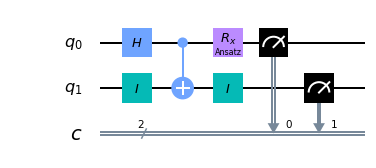

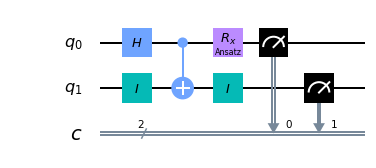

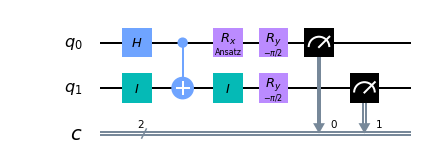

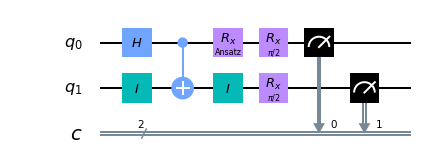

In [98]:
#defining the circuit
qc = [QuantumCircuit(2, 2) for _ in range(4)]
#anzatz definition
param = qiskit.circuit.Parameter('Ansatz')
for i in range(4):  
    qc[i].h(0)
    qc[i].i(1)
    qc[i].cx(0,1)
    qc[i].rx(param, 0)
    qc[i].i(1)

qc[2].ry(-np.pi/2, [0,1])
qc[3].rx(np.pi/2, [0,1])

for i in range(4):
    qc[i].measure([0,1],[0,1])
    display(qc[i].draw('mpl'))



In [99]:
#running the simulator
import math
num_shots = 1000
sim = Aer.get_backend('qasm_simulator')
output = []
for i in np.linspace(-2*np.pi, 2*np.pi, 300):
    out = []
    for circuit in qc:
        circuit = circuit.assign_parameters({param: i})
        job = execute(circuit, sim, shots = num_shots)
        result = job.result()
        out.append(result.get_counts(circuit))
    output.append(out)
for i in output:
    print(i)

[{'00': 490, '11': 510}, {'00': 490, '11': 510}, {'00': 506, '11': 494}, {'10': 508, '01': 492}]
[{'00': 503, '11': 497}, {'00': 505, '11': 494, '10': 1}, {'00': 495, '11': 505}, {'10': 525, '01': 475}]
[{'00': 506, '11': 494}, {'00': 532, '11': 468}, {'00': 507, '11': 493}, {'10': 453, '01': 547}]
[{'00': 478, '11': 517, '10': 3, '01': 2}, {'00': 480, '11': 516, '10': 2, '01': 2}, {'00': 508, '11': 492}, {'11': 1, '10': 505, '01': 494}]
[{'00': 496, '11': 496, '10': 6, '01': 2}, {'00': 501, '11': 492, '10': 4, '01': 3}, {'00': 521, '11': 479}, {'00': 3, '11': 1, '10': 503, '01': 493}]
[{'00': 506, '11': 483, '10': 6, '01': 5}, {'00': 501, '11': 491, '10': 3, '01': 5}, {'00': 502, '11': 498}, {'00': 10, '11': 6, '10': 530, '01': 454}]
[{'00': 501, '11': 478, '10': 16, '01': 5}, {'00': 480, '11': 499, '10': 11, '01': 10}, {'00': 497, '11': 503}, {'00': 6, '11': 4, '10': 483, '01': 507}]
[{'00': 476, '11': 504, '10': 6, '01': 14}, {'00': 484, '11': 490, '10': 14, '01': 12}, {'00': 486, '

In [100]:
final = []
for i in output:
    out2 = []
    for j in range(4):
        avg = 0
        for key, value in i[j].items():
            avg += eig_values[j][key]*value
        out2.append(avg/num_shots)
    final.append(-1/2*(out2[2] + out2[3]) + 1/2*(out2[0] + out2[1]))
print('minimum eigenvalue = ', min(final))

minimum eigenvalue =  -0.041999999999999996


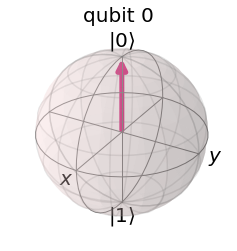

In [91]:
from qiskit.tools.visualization import plot_bloch_multivector
qc = QuantumCircuit(1)
qc.ry(np.pi/2, 0)
qc.ry(-np.pi/2, 0)

# qc.rx(-np.pi/2, 0)
# qc.rx(np.pi/2, 0)

sim = Aer.get_backend('statevector_simulator')
result = execute(qc, sim).result()
plot_bloch_multivector(result.get_statevector())